In [1]:
# Libraries
import os
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Sbopen, Sbapi
from warnings import filterwarnings
import matplotlib.patheffects as path_effects
from mplsoccer import Pitch, Sbopen, VerticalPitch                                                      

filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Griezmann tendencies shown at the World Cup
- Most chances created of the whole tournament
- Good at receiving the ball in between lines
- Dangerous passes with high threat
- Favors the right side
- Defensively force play away from Mbappe’s side
- Came back all the way into the penalty box to help defend

In [2]:
creds = {'user':'juan.bautista@xpecta.co','passwd':'GwOaHOqy'}

In [3]:
parser = Sbapi(username=creds['user'],password=creds['passwd'],dataframe=True)

In [4]:
wc_matches = parser.match(competition_id=43,season_id=106)
wc_matches.sample(5)

,match_id,match_date,kick_off,home_score,away_score,attendance,behind_closed_doors,neutral_ground,play_status,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_youth,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_youth,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
29,3857299,2022-11-28,2022-11-28 15:00:00,2,3,43983,False,False,Normal,available,available,2023-01-11 15:05:49.351319,2023-01-25 22:03:37.309007,2,43,International,FIFA World Cup,106,2022,791,South Korea,male,False,H,121,Korea (South),5688,Paulo Jorge Gomes Bento,Paulo Bento,1969-06-20,183,Portugal,4885,Ghana,male,False,H,86,Ghana,1001251,Otto Addo,Otto Addo,1975-06-09,86,Ghana,1.1.0,2,2,10,Group Stage,94425,Education City Stadium,185,Qatar,8.0,Anthony Taylor,68.0,England
1,3869118,2022-12-04,2022-12-04 21:00:00,3,0,65985,False,False,Normal,available,available,2023-01-03 01:20:49.323103,2022-12-13 21:39:52.223504,4,43,International,FIFA World Cup,106,2022,768,England,male,False,None,68,England,277,Gareth Southgate,Gareth Southgate,1970-09-03,68,England,787,Senegal,male,False,None,202,Senegal,635,Aliou Cissé,Aliou Cissé,1976-03-24,202,Senegal,1.1.0,2,2,33,Round of 16,1001113,Al Bayt Stadium,185,Qatar,1834.0,Ivan Arcides Barton Cisneros,67.0,El Salvador
28,3857300,2022-11-22,2022-11-22 12:00:00,1,2,88012,False,False,Normal,available,available,2022-12-04 07:09:44.183219,2022-11-26 09:05:24.851804,1,43,International,FIFA World Cup,106,2022,779,Argentina,male,False,C,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,799,Saudi Arabia,male,False,C,200,Saudi Arabia,642,Hervé Renard,Hervé Renard,1968-09-30,78,France,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,943.0,Slavko Vinčić,208.0,Slovenia
48,3857275,2022-11-30,2022-11-30 17:00:00,1,0,43627,False,False,Normal,available,available,2023-01-31 22:33:44.094484,2022-12-01 15:27:09.573886,3,43,International,FIFA World Cup,106,2022,777,Tunisia,male,False,D,232,Tunisia,1001303,Jalel Kadri,Jalel Kadri,NaT,232,Tunisia,771,France,male,False,D,78,France,545,Didier Deschamps,Didier Deschamps,1968-10-15,78,France,1.1.0,2,2,10,Group Stage,94425,Education City Stadium,185,Qatar,739.0,Matthew Conger,163.0,New Zealand
60,3857258,2022-11-24,2022-11-24 21:00:00,2,0,88103,False,False,Normal,available,available,2023-01-28 11:13:31.927333,2022-12-06 17:57:00.355945,1,43,International,FIFA World Cup,106,2022,781,Brazil,male,False,G,31,Brazil,4704,Telê Santana da Silva,Telê Santana,1931-07-26,31,Brazil,786,Serbia,male,False,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"


In [5]:
fra_match_ids = wc_matches.loc[(wc_matches['home_team_name']=='France') | (wc_matches['away_team_name']=='France'),'match_id'].tolist()
no_matches = len(fra_match_ids)
fra_match_ids

[3869685, 3869354, 3869552, 3869152, 3857266, 3857279, 3857275]

In [6]:
fra_df = pd.DataFrame()

for m_id in tqdm.tqdm(fra_match_ids):
    temp_df = parser.event(match_id=m_id)[0]
    temp_df = temp_df[temp_df['team_name']=='France']
    fra_df = pd.concat([fra_df,temp_df],ignore_index=True)

100%|██████████| 7/7 [00:53<00:00,  7.58s/it]


In [7]:
fra_df.sample(5)

,id,index,period,timestamp,minute,second,possession,obv_for_after,obv_for_before,obv_for_net,obv_against_after,obv_against_before,obv_against_net,obv_total_net,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,pass_switch,outcome_id,outcome_name,under_pressure,off_camera,counterpress,block_deflection,pass_deflected,foul_won_defensive,out,pass_cross,technique_id,technique_name,aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,z,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,shot_first_time,foul_committed_penalty,foul_won_penalty,dribble_nutmeg,dribble_overrun,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name,pass_cut_back,injury_stoppage_in_chain,pass_miscommunication,block_save_block,dribble_no_touch,shot_open_goal,pass_no_touch,shot_deflected
8144,3f3e867b-0954-44af-b430-9639796b8395,2461,2,00:13:45.449000,58,45,104,0.011148,0.010181,0.000967,0.010390,0.009924,0.000466,0.000501,1.105384,3857266,30,Pass,771,France,4,From Throw In,771,France,NaN,8519.0,Dayotchanculle Upamecano,5.0,Left Center Back,3026.0,Adrien Rabiot,17.362604,2.757878,2.0,Low Pass,41.3,6.6,67.0,Throw-in,NaN,NaN,57.4,0.1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4128,111280eb-276b-4759-aad4-86a653b69b3a,1508,1,00:38:40.451000,38,40,58,0.061131,0.027949,0.033182,0.008486,0.008863,-0.000377,0.033559,1.322136,3869552,30,Pass,771,France,1,Regular Play,771,France,NaN,5477.0,Ousmane Dembélé,17.0,Right Wing,5487.0,Antoine Griezmann,21.708294,-0.138640,1.0,Ground Pass,107.2,56.7,NaN,NaN,38.0,Left Foot,85.7,59.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577,238730a4-5b45-42ad-a44b-3d10a09cdd3f,361,1,00:08:04.208000,8,4,10,0.019179,0.018717,0.000463,0.009185,0.009082,0.000103,0.000360,0.040000,3869552,43,Carry,771,France,1,Regular Play,771,France,NaN,4445.0,Jules Koundé,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,70.7,68.9,NaN,NaN,NaN,NaN,71.2,68.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7161,71209964-51ce-4298-9a7e-dcca9d8dc64d,589,1,00:10:44.118000,10,44,18,0.011249,0.010996,0.000252,0.011042,0.010994,0.000048,0.000204,1.519171,3857266,43,Carry,771,France,8,From Keeper,771,France,NaN,6704.0,Theo Bernard François Hernández,6.0,Left Back,NaN,NaN,NaN,NaN,NaN,NaN,39.1,3.0,NaN,NaN,NaN,NaN,35.6,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12431,38cda65f-b225-493d-b93b-1262aeba9f75,2384,2,00:21:23.999000,66,23,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857275,42,Ball Receipt,771,France,4,From Throw In,771,France,NaN,11135.0,Ibrahima Konaté,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.9,40.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First Visualization: Chances created / dangerous passes (?)

- Show passes with threat
- Heat maps?

In [8]:
#declare an empty dataframe
danger_passes = pd.DataFrame()
for period in [1, 2]:
    #keep only accurate passes by France that were not set pieces in this period
    mask_pass = (fra_df.type_name == "Pass") & (fra_df.outcome_name.isnull()) & (fra_df.period == period) & (fra_df.sub_type_name.isnull()) & (fra_df.player_name == 'Antoine Griezmann')
    #keep only necessary columns
    passes = fra_df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
    #keep only Shots by France in this period
    mask_shot = (fra_df.type_name == "Shot") & (fra_df.period == period) & (fra_df.shot_statsbomb_xg>0.07)
    #keep only necessary columns
    shots = fra_df.loc[mask_shot, ["minute", "second"]]
    #convert time to seconds
    shot_times = shots['minute']*60+shots['second']
    shot_window = 15  
    #find starts of the window
    shot_start = shot_times - shot_window
    #condition to avoid negative shot starts
    shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
    #convert to seconds
    pass_times = passes['minute']*60+passes['second']
    #check if pass is in any of the windows for this half
    pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())
    
    #keep only danger passes
    danger_passes_period = passes.loc[pass_to_shot]
    #concatenate dataframe with a previous one to keep danger passes from the whole tournament
    danger_passes = pd.concat([danger_passes, danger_passes_period])

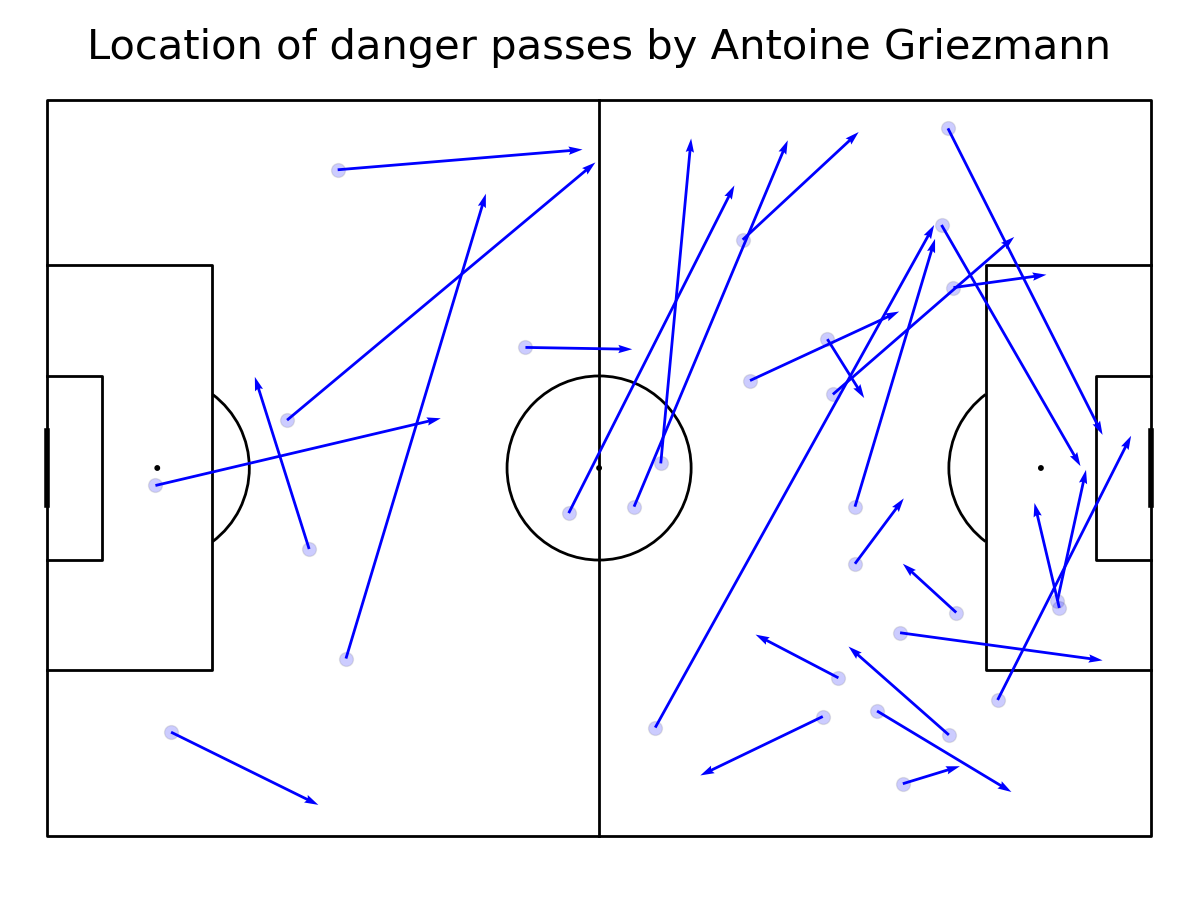

In [9]:
#plot pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#scatter the location on the pitch
pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
#uncomment it to plot arrows
pitch.arrows(danger_passes.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color = "blue", ax=ax['pitch'], width=2)
#add title
fig.suptitle('Location of danger passes by Antoine Griezmann', fontsize = 30)
plt.show()

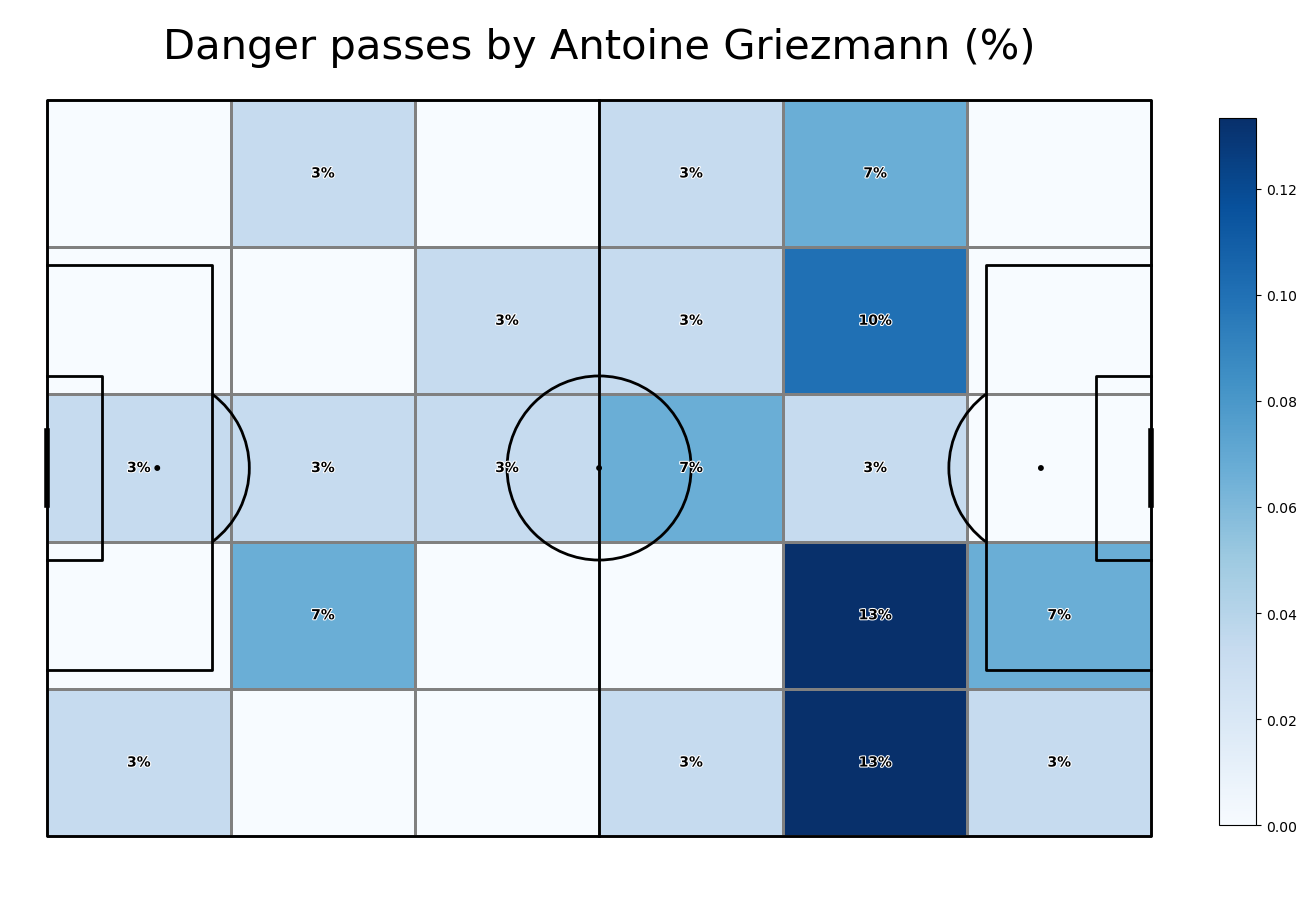

In [10]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram 
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/len(danger_passes)
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

for x in range(bin_statistic['cx'].shape[0]):
    for y in range(bin_statistic['cx'].shape[1]):
        if bin_statistic['statistic'][x,y] > .02:
            text_ = ax['pitch'].annotate(
                xy = (bin_statistic['cx'][x,y], bin_statistic['cy'][x,y]),
                text = f"{bin_statistic['statistic'][x,y]:.0%}",
                ha = "center",
                va = "center",
                color = "black",
                size = 10,
                weight = "bold",
                zorder = 3
            )

            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
            )

fig.suptitle('Danger passes by Antoine Griezmann (%)', fontsize = 30)
plt.show()

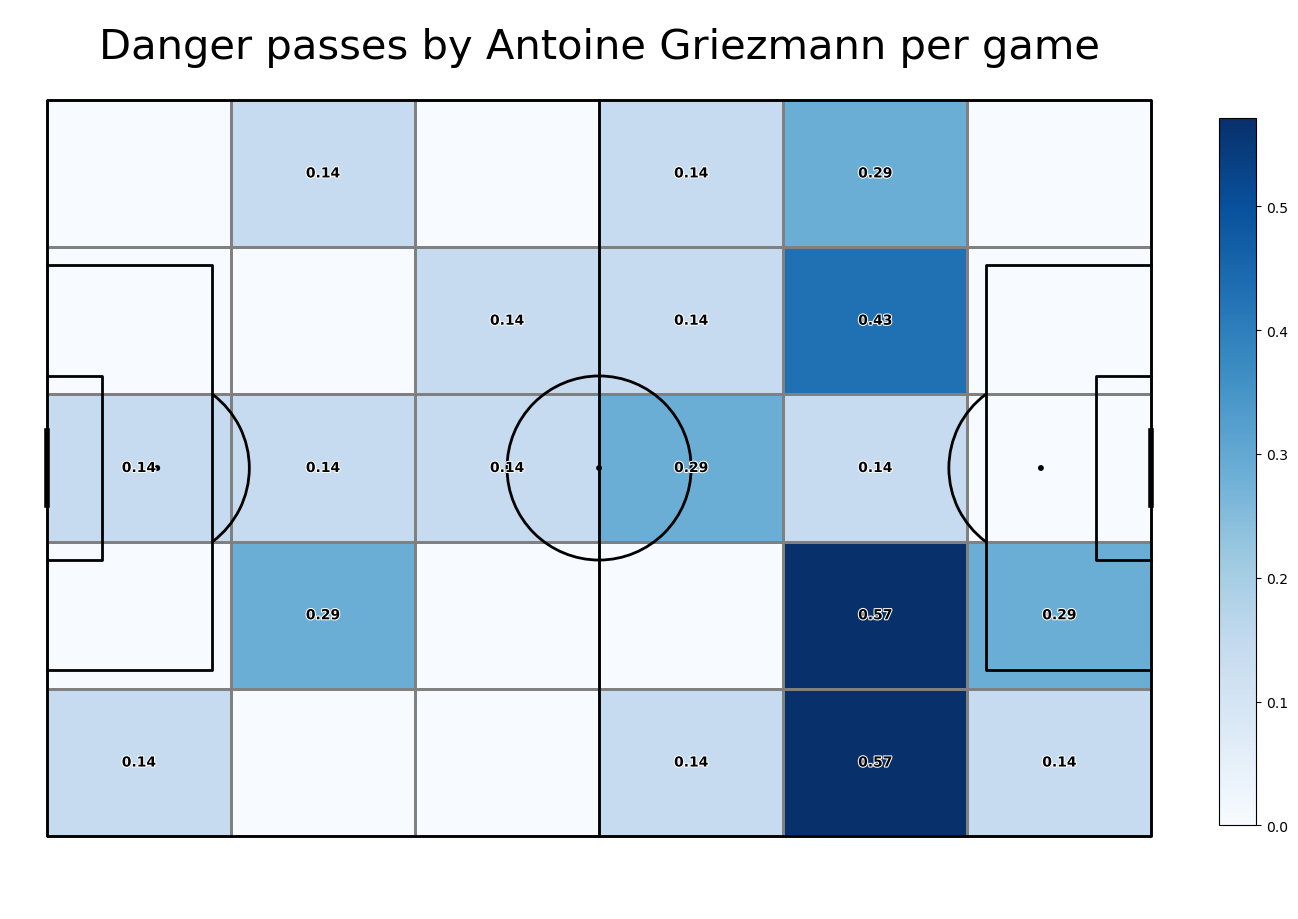

In [11]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram 
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_matches
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

for x in range(bin_statistic['cx'].shape[0]):
    for y in range(bin_statistic['cx'].shape[1]):
        if bin_statistic['statistic'][x,y] > .02:
            text_ = ax['pitch'].annotate(
                xy = (bin_statistic['cx'][x,y], bin_statistic['cy'][x,y]),
                text = f"{bin_statistic['statistic'][x,y]:.2f}",
                ha = "center",
                va = "center",
                color = "black",
                size = 10,
                weight = "bold",
                zorder = 3
            )

            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
            )

fig.suptitle('Danger passes by Antoine Griezmann per game', fontsize = 30)
plt.show()

### Second Visualization: Ball reception in between lines

- Ball receipt


In [12]:
#declare an empty dataframe
ball_receipt = pd.DataFrame()
for period in [1, 2]:
    #keep only ball receptionse by France that were not set pieces in this period
    mask_pass = (fra_df.type_name == "Ball Receipt") & (fra_df.outcome_name.isnull()) & (fra_df.period == period) & (fra_df.sub_type_name.isnull()) & (fra_df.player_name == 'Antoine Griezmann')
    
    #keep only necessary columns
    passes = fra_df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]

    #concatenate dataframe with a previous one to keep danger passes from the whole tournament
    ball_receipt = pd.concat([ball_receipt, passes])

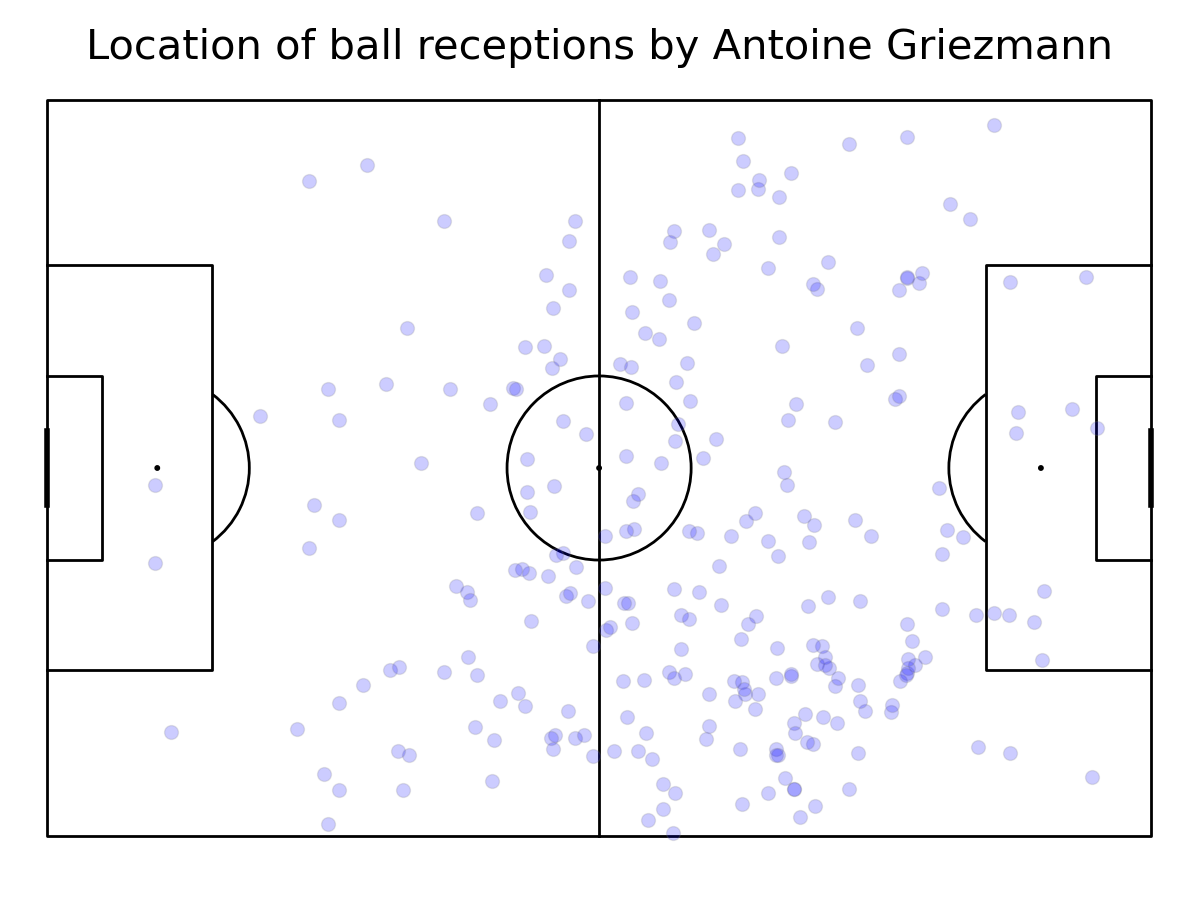

In [13]:
#plot pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#scatter the location on the pitch
pitch.scatter(ball_receipt.x, ball_receipt.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
#add title
fig.suptitle('Location of ball receptions by Antoine Griezmann', fontsize = 30)
plt.show()

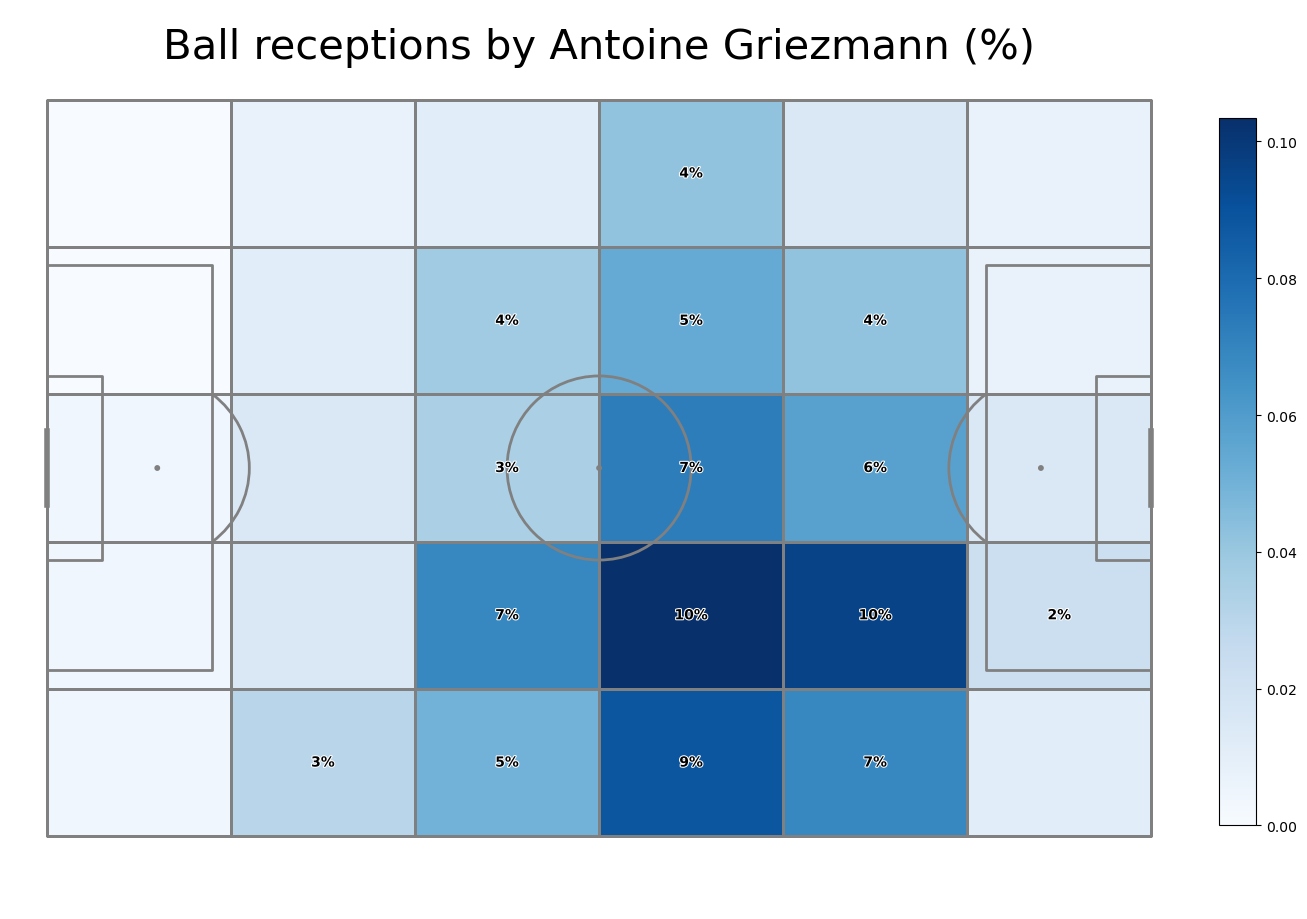

In [14]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram 
bin_statistic = pitch.bin_statistic(ball_receipt.x, ball_receipt.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/len(ball_receipt)
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

for x in range(bin_statistic['cx'].shape[0]):
    for y in range(bin_statistic['cx'].shape[1]):
        if bin_statistic['statistic'][x,y] > .02:
            text_ = ax['pitch'].annotate(
                xy = (bin_statistic['cx'][x,y], bin_statistic['cy'][x,y]),
                text = f"{bin_statistic['statistic'][x,y]:.0%}",
                ha = "center",
                va = "center",
                color = "black",
                size = 10,
                weight = "bold",
                zorder = 3
            )

            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
            )

fig.suptitle('Ball receptions by Antoine Griezmann (%)', fontsize = 30)
plt.show()

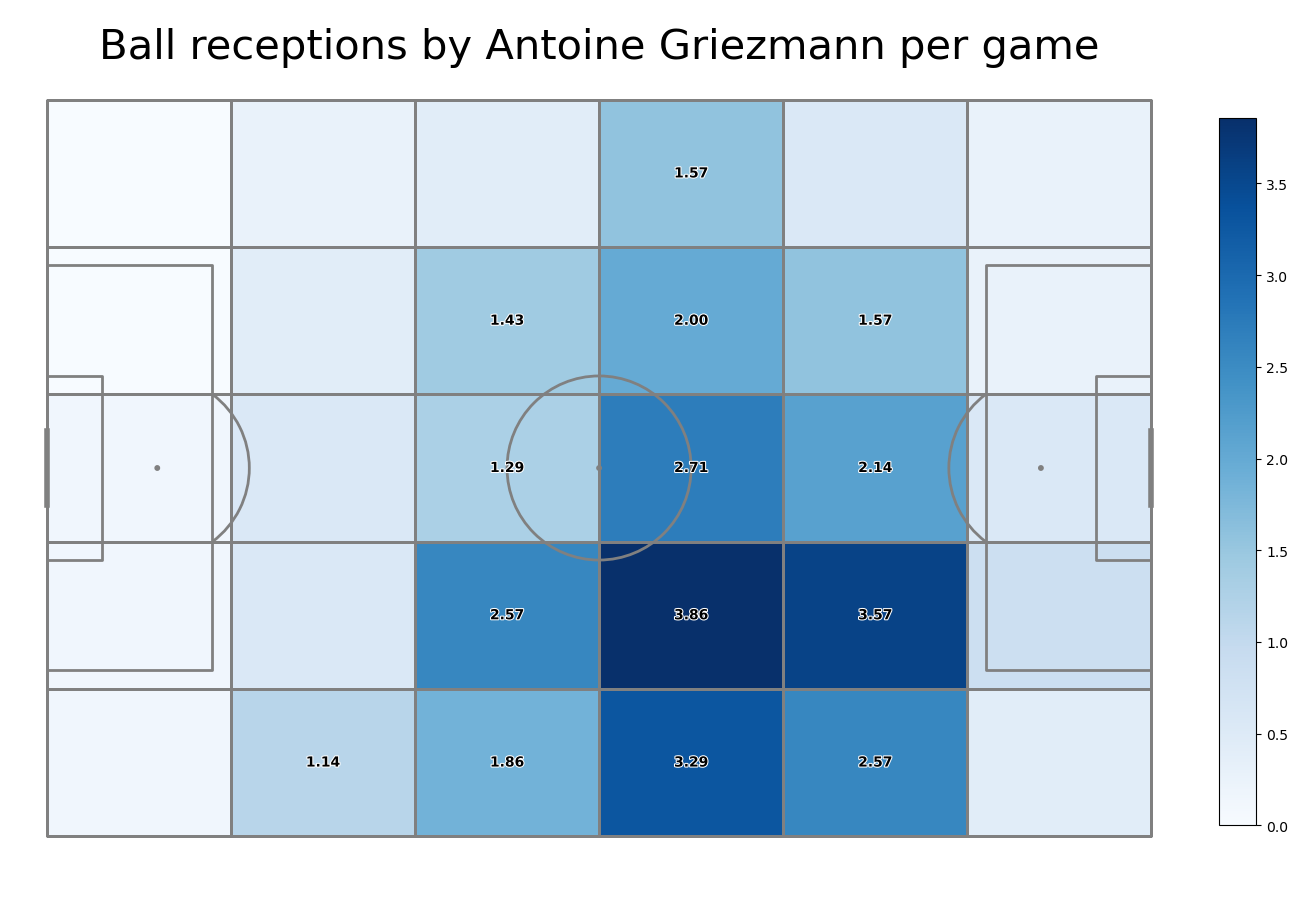

In [15]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram 
bin_statistic = pitch.bin_statistic(ball_receipt.x, ball_receipt.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_matches
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

for x in range(bin_statistic['cx'].shape[0]):
    for y in range(bin_statistic['cx'].shape[1]):
        if bin_statistic['statistic'][x,y] > 1:
            text_ = ax['pitch'].annotate(
                xy = (bin_statistic['cx'][x,y], bin_statistic['cy'][x,y]),
                text = f"{bin_statistic['statistic'][x,y]:.2f}",
                ha = "center",
                va = "center",
                color = "black",
                size = 10,
                weight = "bold",
                zorder = 3
            )

            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
            )

fig.suptitle('Ball receptions by Antoine Griezmann per game', fontsize = 30)
plt.show()

### Third Visualization: Defensive actions

- Pressure, Ball Recovery, Interception

In [16]:
#keep only accurate passes by France that were not set pieces in this period
mask_press = (fra_df.type_name.isin(["Pressure",'Ball Recovery'])) & (fra_df.player_name == 'Antoine Griezmann')

#keep only necessary columns
pressure = fra_df.loc[mask_press, ['duration',"x", "y","minute","second","player_name","type_name","period"]]
pressure['color'] = pressure.apply(lambda x: 'Blue' if x["type_name"] == 'Pressure' else 'Red',axis=1)
pressure["color"] = pressure['color'].shift(-1)
pressure['x_br'] = pressure['x'].shift(-1)
pressure['y_br'] = pressure['y'].shift(-1)
pressure['minute_br'] = pressure['minute'].shift(-1)
pressure['second_br'] = pressure['second'].shift(-1)
pressure['next_type_name'] = pressure['type_name'].shift(-1)
pressure['next_next_period'] = pressure['period'].shift(-1)
pressure = pressure[pressure['type_name']=='Pressure']
pressure['label'] = pressure.apply(lambda x: 'Ball Recovery' if x['color']=='Red' else 'No Ball Recovery', axis=1)
new_pressure = pressure.loc[(pressure['minute']*60+pressure['second']>(pressure['minute_br']*60+pressure['second_br']-8))&\
                            (pressure['minute']*60+pressure['second']<(pressure['minute_br']*60+pressure['second_br']))&\
                            (pressure['label']=='Ball Recovery')&\
                            (pressure['period']==pressure['next_next_period'])]
new_pressure

,duration,x,y,minute,second,player_name,type_name,period,color,x_br,y_br,minute_br,second_br,next_type_name,next_next_period,label
3461,0.493198,38.6,71.4,1,36,Antoine Griezmann,Pressure,1,Red,28.7,66.9,1.0,39.0,Ball Recovery,1.0,Ball Recovery
6811,0.400274,46.0,41.7,92,29,Antoine Griezmann,Pressure,2,Red,44.3,45.1,92.0,30.0,Ball Recovery,2.0,Ball Recovery
7539,1.765653,86.2,7.7,32,35,Antoine Griezmann,Pressure,1,Red,77.5,10.8,32.0,42.0,Ball Recovery,1.0,Ball Recovery


In [17]:
pressure

,duration,x,y,minute,second,player_name,type_name,period,color,x_br,y_br,minute_br,second_br,next_type_name,next_next_period,label
12,0.441545,109.3,37.0,1,27,Antoine Griezmann,Pressure,1,Blue,50.1,68.4,2.0,13.0,Pressure,1.0,No Ball Recovery
33,0.840068,50.1,68.4,2,13,Antoine Griezmann,Pressure,1,Blue,28.7,72.3,4.0,16.0,Pressure,1.0,No Ball Recovery
50,0.461656,28.7,72.3,4,16,Antoine Griezmann,Pressure,1,Blue,54.2,42.7,4.0,52.0,Pressure,1.0,No Ball Recovery
72,0.197010,54.2,42.7,4,52,Antoine Griezmann,Pressure,1,Blue,48.8,58.1,20.0,35.0,Pressure,1.0,No Ball Recovery
318,0.451428,48.8,58.1,20,35,Antoine Griezmann,Pressure,1,Blue,82.4,61.3,29.0,44.0,Pressure,1.0,No Ball Recovery
393,0.230207,82.4,61.3,29,44,Antoine Griezmann,Pressure,1,Blue,30.0,32.9,31.0,14.0,Pressure,1.0,No Ball Recovery
406,0.440226,30.0,32.9,31,14,Antoine Griezmann,Pressure,1,Blue,30.6,45.7,32.0,13.0,Pressure,1.0,No Ball Recovery
412,0.568761,30.6,45.7,32,13,Antoine Griezmann,Pressure,1,Blue,46.5,69.7,33.0,2.0,Pressure,1.0,No Ball Recovery
421,0.455495,46.5,69.7,33,2,Antoine Griezmann,Pressure,1,Blue,62.5,62.6,34.0,1.0,Pressure,1.0,No Ball Recovery
429,0.323768,62.5,62.6,34,1,Antoine Griezmann,Pressure,1,Blue,44.8,65.4,48.0,36.0,Pressure,2.0,No Ball Recovery


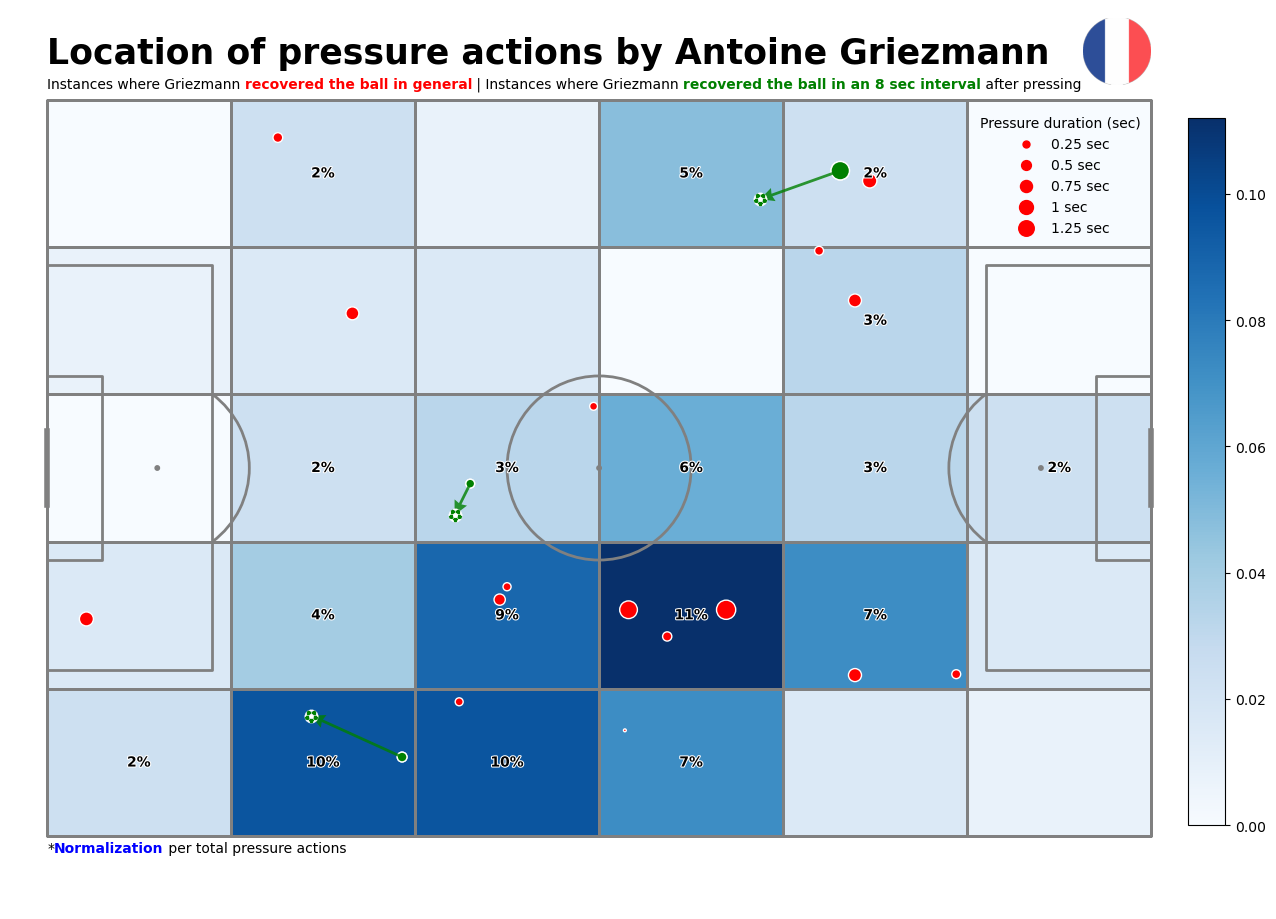

In [139]:
import urllib
from PIL import Image
from highlight_text import fig_text
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#get the 2D histogram
bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/len(pressure)
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((0.975, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

for x in range(bin_statistic['cx'].shape[0]):
    for y in range(bin_statistic['cx'].shape[1]):
        if bin_statistic['statistic'][x,y] > .02:
            text_ = ax['pitch'].annotate(
                xy = (bin_statistic['cx'][x,y], bin_statistic['cy'][x,y]),
                text = f"{bin_statistic['statistic'][x,y]:.0%}",
                ha = "center",
                va = "center",
                color = "black",
                size = 10,
                weight = "bold",
                zorder = 3
            )

            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
            )

fig_text(
    x = 0.055, y = 0.97,
    s = "Location of pressure actions by Antoine Griezmann",
    color = "black",
    weight = "bold",
    size = 25,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.055, y = 0.925,
    s = "Instances where Griezmann <recovered the ball in general> | Instances where Griezmann <recovered the ball in an 8 sec interval> after pressing",
    highlight_textprops = [
        {"color": 'Red', "weight": "bold"},
        {"color": 'Green', "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.055, y = 0.075,
    s = "*<Normalization> per total pressure actions",
    highlight_textprops = [
        {"color": 'Blue', "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.88, .915, 0.075, 0.075], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}6723.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

pitch.scatter(pressure[pressure['label']=='Ball Recovery'].x, pressure[pressure['label']=='Ball Recovery'].y, s=pressure[pressure['label']=='Ball Recovery'].duration*100,
              color=pressure.loc[pressure['label']=='Ball Recovery','color'], edgecolors='white', linewidth=1, alpha=1, ax=ax["pitch"])

pitch.scatter(new_pressure.x, new_pressure.y, s=new_pressure.duration*100,color='green', edgecolors='white', linewidth=1, alpha=1, ax=ax["pitch"])

pitch.arrows(new_pressure[new_pressure['label']=='Ball Recovery'].x, new_pressure[new_pressure['label']=='Ball Recovery'].y,
             new_pressure[new_pressure['label']=='Ball Recovery'].x_br, new_pressure[new_pressure['label']=='Ball Recovery'].y_br,
             width=2,headwidth=5, headlength=5,color='green', edgecolors='white', alpha=0.8, ax=ax["pitch"])

pitch.scatter(new_pressure.x_br, new_pressure.y_br, s=100, c='green', marker="football", edgecolors='white', linewidth=0.2, alpha=1, ax=ax["pitch"])


for dur in [0.25,0.5,0.75,1,1.25]:
    pitch.scatter([], [], c='r', alpha=1, s=dur*100,
                label=str(dur) + ' sec', ax=ax["pitch"])
ax['pitch'].legend(scatterpoints=1, frameon=False, labelspacing=0.5, title='Pressure duration (sec)', loc='upper left', bbox_to_anchor=(0.813, 0.95))


#fig.suptitle('Pressure applied zones by Antoine Griezmann (%)', fontsize = 30)
plt.show()

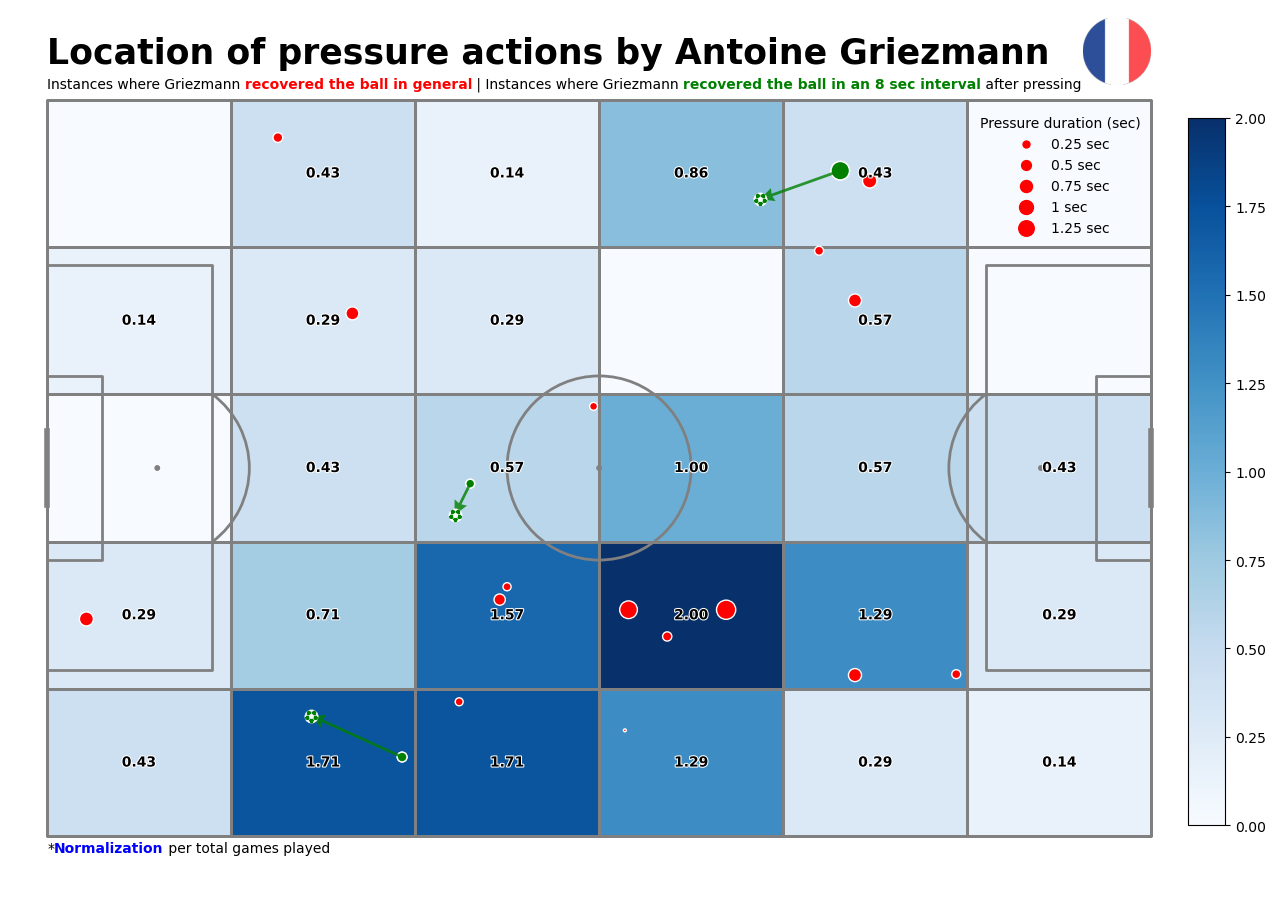

In [140]:
import urllib
from PIL import Image
from highlight_text import fig_text
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#get the 2D histogram
bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_matches
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((0.975, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

for x in range(bin_statistic['cx'].shape[0]):
    for y in range(bin_statistic['cx'].shape[1]):
        if bin_statistic['statistic'][x,y] > .02:
            text_ = ax['pitch'].annotate(
                xy = (bin_statistic['cx'][x,y], bin_statistic['cy'][x,y]),
                text = f"{bin_statistic['statistic'][x,y]:.2f}",
                ha = "center",
                va = "center",
                color = "black",
                size = 10,
                weight = "bold",
                zorder = 3
            )

            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
            )

fig_text(
    x = 0.055, y = 0.97,
    s = "Location of pressure actions by Antoine Griezmann",
    color = "black",
    weight = "bold",
    size = 25,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.055, y = 0.925,
    s = "Instances where Griezmann <recovered the ball in general> | Instances where Griezmann <recovered the ball in an 8 sec interval> after pressing",
    highlight_textprops = [
        {"color": 'Red', "weight": "bold"},
        {"color": 'Green', "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.055, y = 0.075,
    s = "*<Normalization> per total games played",
    highlight_textprops = [
        {"color": 'Blue', "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.88, .915, 0.075, 0.075], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}6723.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

pitch.scatter(pressure[pressure['label']=='Ball Recovery'].x, pressure[pressure['label']=='Ball Recovery'].y, s=pressure[pressure['label']=='Ball Recovery'].duration*100,
              color=pressure.loc[pressure['label']=='Ball Recovery','color'], edgecolors='white', linewidth=1, alpha=1, ax=ax["pitch"])

pitch.scatter(new_pressure.x, new_pressure.y, s=new_pressure.duration*100,color='green', edgecolors='white', linewidth=1, alpha=1, ax=ax["pitch"])

pitch.arrows(new_pressure[new_pressure['label']=='Ball Recovery'].x, new_pressure[new_pressure['label']=='Ball Recovery'].y,
             new_pressure[new_pressure['label']=='Ball Recovery'].x_br, new_pressure[new_pressure['label']=='Ball Recovery'].y_br,
             width=2,headwidth=5, headlength=5,color='green', edgecolors='white', alpha=0.8, ax=ax["pitch"])

pitch.scatter(new_pressure.x_br, new_pressure.y_br, s=100, c='green', marker="football", edgecolors='white', linewidth=0.2, alpha=1, ax=ax["pitch"])


for dur in [0.25,0.5,0.75,1,1.25]:
    pitch.scatter([], [], c='r', alpha=1, s=dur*100,
                label=str(dur) + ' sec', ax=ax["pitch"])
ax['pitch'].legend(scatterpoints=1, frameon=False, labelspacing=0.5, title='Pressure duration (sec)', loc='upper left', bbox_to_anchor=(0.813, 0.95))


#fig.suptitle('Pressure applied zones by Antoine Griezmann (%)', fontsize = 30)
plt.show()

### Comparison to other center attacking midfielders

How does Griezmann compare to other players that played in the same position?

In [141]:
fra_df.loc[fra_df['player_name']=='Antoine Griezmann','position_name'].nunique()

['Center Attacking Midfield', 'Right Center Midfield']

In [244]:
cam_press_df = pd.DataFrame()

for m_id in tqdm.tqdm(wc_matches['match_id'].tolist()):
    temp_df = parser.event(match_id=m_id)[0]
    mask_cam = (temp_df.type_name.isin(["Pressure",'Ball Recovery'])) & (temp_df.position_name == 'Center Attacking Midfield')
    temp_df = temp_df.loc[mask_cam,['duration',"x", "y","minute","second","period","type_name","player_name","team_name"]]
    cam_press_df = pd.concat([cam_press_df,temp_df],ignore_index=True)

100%|██████████| 64/64 [07:08<00:00,  6.70s/it]


In [245]:
matches_per_team = pd.concat([wc_matches['home_team_name'],wc_matches['away_team_name']]).value_counts().reset_index().rename(columns={'index':'team_name',0:'matches_played'})

In [246]:
cam_press_df.head(10) 

,duration,x,y,minute,second,period,type_name,player_name,team_name
0,0.000000,12.6,45.5,93,47,2,Ball Recovery,Denis Lemi Zakaria Lako Lado,Switzerland
1,0.995911,97.4,64.4,0,22,1,Pressure,Iliman Ndiaye,Senegal
2,1.014819,84.0,70.7,4,57,1,Pressure,Iliman Ndiaye,Senegal
3,0.872004,97.2,32.2,5,48,1,Pressure,Iliman Ndiaye,Senegal
4,1.851727,94.6,60.6,9,37,1,Pressure,Iliman Ndiaye,Senegal
5,0.614708,56.3,42.5,10,45,1,Pressure,Iliman Ndiaye,Senegal
6,1.295584,87.3,65.4,13,57,1,Pressure,Iliman Ndiaye,Senegal
7,0.571995,98.2,18.4,23,17,1,Pressure,Iliman Ndiaye,Senegal
8,0.642163,63.1,52.5,26,18,1,Pressure,Iliman Ndiaye,Senegal
9,0.440558,105.9,16.1,34,57,1,Pressure,Iliman Ndiaye,Senegal


In [247]:
cam_press_ratios = cam_press_df.copy()

In [248]:
pivot_cam_press = pd.pivot_table(cam_press_ratios,values='team_name',index='player_name',columns='type_name',aggfunc='count').reset_index().dropna()

In [249]:
pivot_cam_press = pivot_cam_press.merge(cam_press_df[['player_name','team_name']], how='left',on='player_name')

In [250]:
pivot_cam_press = pivot_cam_press.drop_duplicates()

In [251]:
pivot_cam_press = pivot_cam_press.merge(matches_per_team, how='left',on='team_name')

In [252]:
pivot_cam_press.loc[pivot_cam_press['player_name']=='Chang-Hoon Kwon','matches_played'] = 1
pivot_cam_press.loc[pivot_cam_press['player_name']=='Davy Klaassen','matches_played'] = 4
pivot_cam_press.loc[pivot_cam_press['player_name']=='Fabian Frei','matches_played'] = 2
pivot_cam_press.loc[pivot_cam_press['player_name']=='Idrissa Gana Gueye','matches_played'] = 3
pivot_cam_press.loc[pivot_cam_press['player_name']=='Jae-Sung Lee','matches_played'] = 3
pivot_cam_press.loc[pivot_cam_press['player_name']=='Lucas Tolentino Coelho de Lima','matches_played'] = 4
pivot_cam_press.loc[pivot_cam_press['player_name']=='Mason Mount','matches_played'] = 4
pivot_cam_press.loc[pivot_cam_press['player_name']=='Neymar da Silva Santos Junior','matches_played'] = 3
pivot_cam_press.loc[pivot_cam_press['player_name']=='Pape Matar Sarr','matches_played'] = 2
pivot_cam_press.loc[pivot_cam_press['player_name']=='Steven Berghuis','matches_played'] = 4
pivot_cam_press.loc[pivot_cam_press['player_name']=='Woo-Yeong Jeong','matches_played'] = 1
pivot_cam_press.loc[pivot_cam_press['player_name']=='Éverton Augusto de Barros Ribeiro','matches_played'] = 1

In [253]:
pivot_cam_press = pivot_cam_press[pivot_cam_press['matches_played']>3]
pivot_cam_press

,player_name,Ball Recovery,Pressure,team_name,matches_played
2,Andrej Kramarić,3.0,3.0,Croatia,7
4,Antoine Griezmann,24.0,114.0,France,7
5,Boulaye Dia,3.0,6.0,Senegal,4
6,Bruno Miguel Borges Fernandes,3.0,6.0,Portugal,5
9,Cody Mathès Gakpo,11.0,23.0,Netherlands,5
11,Davy Klaassen,5.0,21.0,Netherlands,4
12,Djibril Sow,9.0,31.0,Switzerland,4
17,Jackson Irvine,2.0,9.0,Australia,4
21,Lovro Majer,5.0,5.0,Croatia,7
22,Lucas Tolentino Coelho de Lima,2.0,3.0,Brazil,4


In [269]:
pivot_cam_press['BR/permatch'] = pivot_cam_press['Ball Recovery']/pivot_cam_press['matches_played']
pivot_cam_press['PRESS/permatch'] = pivot_cam_press['Pressure']/pivot_cam_press['matches_played']
pivot_cam_press['Score'] = pivot_cam_press['BR/permatch']+pivot_cam_press['PRESS/permatch']
pivot_cam_press.sort_values(by='BR/permatch', ascending=False)

,player_name,Ball Recovery,Pressure,team_name,matches_played,BR/permatch,PRESS/permatch,Score
4,Antoine Griezmann,24.0,114.0,France,7,3.428571,16.285714,19.714286
12,Djibril Sow,9.0,31.0,Switzerland,4,2.250000,7.750000,10.000000
9,Cody Mathès Gakpo,11.0,23.0,Netherlands,5,2.200000,4.600000,6.800000
25,Mason Mount,7.0,38.0,England,4,1.750000,9.500000,11.250000
34,Rodrygo Silva de Goes,7.0,23.0,Brazil,5,1.400000,4.600000,6.000000
11,Davy Klaassen,5.0,21.0,Netherlands,4,1.250000,5.250000,6.500000
5,Boulaye Dia,3.0,6.0,Senegal,4,0.750000,1.500000,2.250000
21,Lovro Majer,5.0,5.0,Croatia,7,0.714286,0.714286,1.428571
6,Bruno Miguel Borges Fernandes,3.0,6.0,Portugal,5,0.600000,1.200000,1.800000
17,Jackson Irvine,2.0,9.0,Australia,4,0.500000,2.250000,2.750000


In [273]:
per90min_df = pivot_cam_press.sort_values(by='BR/permatch', ascending=False).head(5)
per90min_df['minutes_played'] = 0
per90min_df.loc[per90min_df['player_name']=='Antoine Griezmann','minutes_played'] = 617
per90min_df.loc[per90min_df['player_name']=='Djibril Sow','minutes_played'] = 281
per90min_df.loc[per90min_df['player_name']=='Cody Mathès Gakpo','minutes_played'] = 492
per90min_df.loc[per90min_df['player_name']=='Mason Mount','minutes_played'] = 219
per90min_df.loc[per90min_df['player_name']=='Rodrygo Silva de Goes','minutes_played'] = 208
per90min_df


,player_name,Ball Recovery,Pressure,team_name,matches_played,BR/permatch,PRESS/permatch,Score,minutes_played
4,Antoine Griezmann,24.0,114.0,France,7,3.428571,16.285714,19.714286,617
12,Djibril Sow,9.0,31.0,Switzerland,4,2.250000,7.750000,10.000000,281
9,Cody Mathès Gakpo,11.0,23.0,Netherlands,5,2.200000,4.600000,6.800000,492
25,Mason Mount,7.0,38.0,England,4,1.750000,9.500000,11.250000,219
34,Rodrygo Silva de Goes,7.0,23.0,Brazil,5,1.400000,4.600000,6.000000,208


In [276]:
per90min_df['BR/per90'] = (per90min_df['Ball Recovery']/per90min_df['minutes_played'])*90
per90min_df['PRESS/per90'] = (per90min_df['Pressure']/per90min_df['minutes_played'])*90
per90min_df.sort_values(by='BR/per90', ascending=False)


,player_name,Ball Recovery,Pressure,team_name,matches_played,BR/permatch,PRESS/permatch,Score,minutes_played,BR/per90,PRESS/per90
4,Antoine Griezmann,24.0,114.0,France,7,3.428571,16.285714,19.714286,617,3.500810,16.628849
34,Rodrygo Silva de Goes,7.0,23.0,Brazil,5,1.400000,4.600000,6.000000,208,3.028846,9.951923
12,Djibril Sow,9.0,31.0,Switzerland,4,2.250000,7.750000,10.000000,281,2.882562,9.928826
25,Mason Mount,7.0,38.0,England,4,1.750000,9.500000,11.250000,219,2.876712,15.616438
9,Cody Mathès Gakpo,11.0,23.0,Netherlands,5,2.200000,4.600000,6.800000,492,2.012195,4.207317


In [255]:
pivot_cam_press.loc[pivot_cam_press['player_name']!='Antoine Griezmann','Ball Recovery'].mean()

4.4

In [265]:
cam_press_to_recov = cam_press_df.copy()

cam_press_to_recov['x_next'] = cam_press_to_recov['x'].shift(-1)
cam_press_to_recov['y_next'] = cam_press_to_recov['y'].shift(-1)
cam_press_to_recov['minute_next'] = cam_press_to_recov['minute'].shift(-1)
cam_press_to_recov['second_next'] = cam_press_to_recov['second'].shift(-1)
cam_press_to_recov['next_type_name'] = cam_press_to_recov['type_name'].shift(-1)
cam_press_to_recov['next_player_name'] = cam_press_to_recov['player_name'].shift(-1)
cam_press_to_recov['next_period'] = cam_press_to_recov['period'].shift(-1)
cam_press_to_recov = cam_press_to_recov.loc[(cam_press_to_recov['type_name']=='Pressure') & (cam_press_to_recov['next_type_name']=='Ball Recovery')]

In [266]:
cam_press_to_recov = cam_press_to_recov.loc[(cam_press_to_recov['player_name']==cam_press_to_recov['next_player_name'])&(cam_press_to_recov['period']==cam_press_to_recov['next_period'])]
cam_press_to_recov = cam_press_to_recov.loc[cam_press_to_recov['player_name'].isin(pivot_cam_press['player_name'].unique().tolist())]
cam_press_to_recov

,duration,x,y,minute,second,period,type_name,player_name,team_name,x_next,y_next,minute_next,second_next,next_type_name,next_player_name,next_period
31,0.329573,44.8,65.4,48,36,2,Pressure,Antoine Griezmann,France,69.8,17.9,49.0,9.0,Ball Recovery,Antoine Griezmann,2.0
37,0.701413,109.9,27.6,2,4,1,Pressure,Andrej Kramarić,Croatia,19.5,5.9,11.0,2.0,Ball Recovery,Andrej Kramarić,1.0
42,1.362904,59.3,13.6,45,24,1,Pressure,Lovro Majer,Croatia,78.8,22.0,46.0,32.0,Ball Recovery,Lovro Majer,1.0
45,2.473375,106.4,56.2,54,38,2,Pressure,Lovro Majer,Croatia,21.7,26.7,62.0,17.0,Ball Recovery,Lovro Majer,2.0
48,2.556205,86.1,19.5,79,1,2,Pressure,Mario Pašalić,Croatia,28.5,36.9,79.0,44.0,Ball Recovery,Mario Pašalić,2.0
52,0.877158,34.9,15.6,89,10,2,Pressure,Mario Pašalić,Croatia,5.2,62.4,89.0,51.0,Ball Recovery,Mario Pašalić,2.0
69,1.067056,89.4,8.8,32,34,1,Pressure,Antoine Griezmann,France,25.0,31.7,33.0,27.0,Ball Recovery,Antoine Griezmann,1.0
76,0.442343,67.4,58.3,58,50,2,Pressure,Antoine Griezmann,France,77.3,35.2,59.0,59.0,Ball Recovery,Antoine Griezmann,2.0
80,0.413962,83.9,16.4,66,24,2,Pressure,Antoine Griezmann,France,52.9,59.6,66.0,57.0,Ball Recovery,Antoine Griezmann,2.0
88,0.493198,38.6,71.4,1,36,1,Pressure,Antoine Griezmann,France,28.7,66.9,1.0,39.0,Ball Recovery,Antoine Griezmann,1.0


In [267]:
new_cam_press = cam_press_to_recov.loc[(cam_press_to_recov['minute']*60+cam_press_to_recov['second']>(cam_press_to_recov['minute_next']*60+cam_press_to_recov['second_next']-8))&\
                            (cam_press_to_recov['minute']*60+cam_press_to_recov['second']<(cam_press_to_recov['minute_next']*60+cam_press_to_recov['second_next']))&\
                            (cam_press_to_recov['period']==cam_press_to_recov['next_period'])]
new_cam_press

,duration,x,y,minute,second,period,type_name,player_name,team_name,x_next,y_next,minute_next,second_next,next_type_name,next_player_name,next_period
88,0.493198,38.6,71.4,1,36,1,Pressure,Antoine Griezmann,France,28.7,66.9,1.0,39.0,Ball Recovery,Antoine Griezmann,1.0
195,0.400274,46.0,41.7,92,29,2,Pressure,Antoine Griezmann,France,44.3,45.1,92.0,30.0,Ball Recovery,Antoine Griezmann,2.0
265,2.111073,53.5,66.0,30,42,1,Pressure,Djibril Sow,Switzerland,42.6,58.2,30.0,45.0,Ball Recovery,Djibril Sow,1.0
328,1.765653,86.2,7.7,32,35,1,Pressure,Antoine Griezmann,France,77.5,10.8,32.0,42.0,Ball Recovery,Antoine Griezmann,1.0
646,0.261713,44.9,24.5,0,41,1,Pressure,Rodrygo Silva de Goes,Brazil,46.7,24.0,0.0,44.0,Ball Recovery,Rodrygo Silva de Goes,1.0
763,0.057268,72.4,5.4,31,46,1,Pressure,Mason Mount,England,64.7,15.3,31.0,50.0,Ball Recovery,Mason Mount,1.0
